2014-02-16 00:00:00 missing data


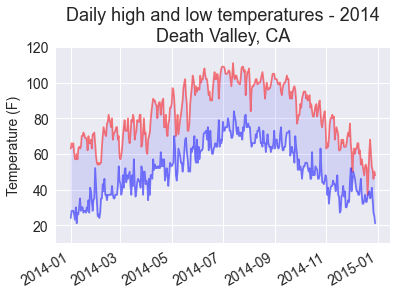

In [1]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

#get dates, high and low temperature from file
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
          
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
        
    #print(highs)
    
#Plot data
plt.style.use('seaborn')

fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)


#Format Plot
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=18)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(10, 120)

plt.show()

2014-02-16 00:00:00 missing data


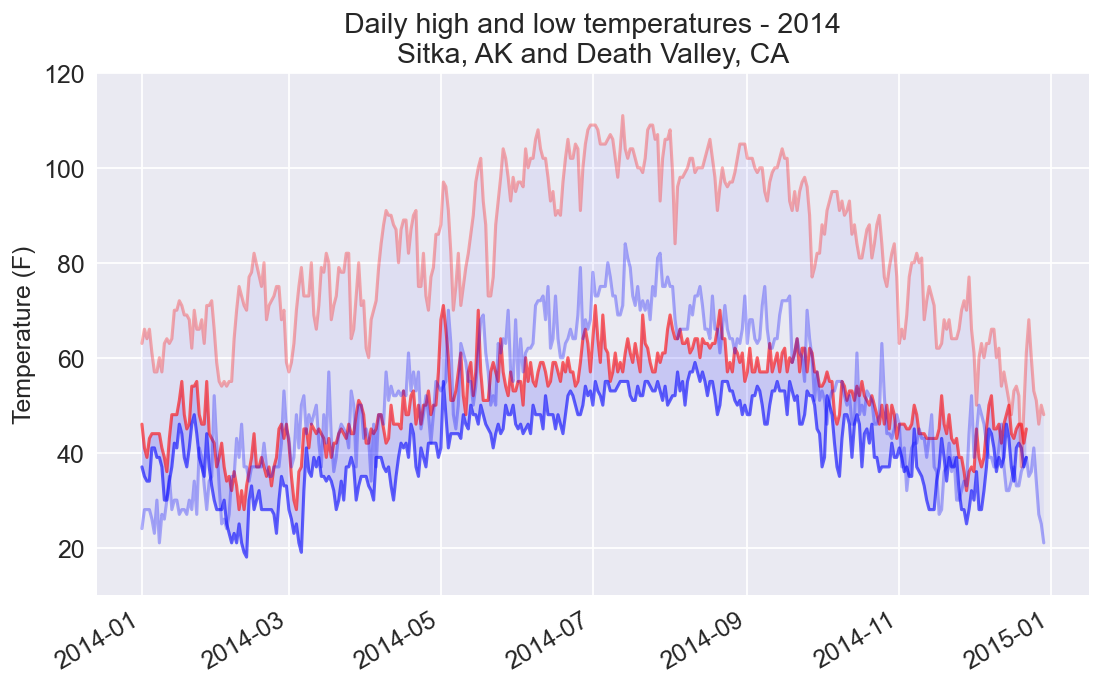

In [6]:
#creatin a function to read csv files
import csv
from datetime import datetime

from matplotlib import pyplot as plt

def get_weather_data(filename, dates, highs, lows):
    """Get highs and lows from csv file"""
    with open(filename) as f:
        reader=csv.reader(f)
        header_row=next(reader)
        
        for row in reader:
            try:
                current_date = datetime.strptime(row[0], "%Y-%m-%d")
                high=int(row[1])
                low=int(row[3])
            except ValueError:
                print(current_date, 'missing data')
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)
                
#Get weather data for Sitka
dates, highs, lows = [], [], []
get_weather_data('sitka_weather_2014.csv', dates, highs, lows)

#Plot Sitka weather data
#plt.style.use('seaborn')
#fig, ax = plt.subplots()
#ax.plot(dates, highs, c='red', alpha=0.7)
#ax.plot(dates, lows, c='blue', alpha=0.7)

fig=plt.figure(dpi=128, figsize=(10,6))
plt.plot(dates, highs, c='red', alpha=0.6)
plt.plot(dates, lows, c='blue', alpha=0.6)

plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.15)

#Get weather data for Death Valley
dates, highs, lows = [], [], []
get_weather_data('death_valley_2014.csv', dates, highs, lows)

#Add Death Valley to current plot
plt.plot(dates, highs, c='red', alpha=0.3)
plt.plot(dates, lows, c='blue', alpha=0.3)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)

#Format Plot
title = "Daily high and low temperatures - 2014"
title += "\nSitka, AK and Death Valley, CA"
plt.title(title, fontsize=16)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(10, 120)

plt.show()


